# Classification trees on Titanic Data

This is a tutorial on how to use Python to train models to predict if a passenfer is survived on the Titanic.

- The **training** dataset can be downloaded at [this link](https://bryantstats.github.io/math460/data/titanic_train.csv).
- The **test** dataset can be downloaded at [this link](https://bryantstats.github.io/math460/data/titanic_test.csv).
- The variable information can be found at [Kaggle](https://www.kaggle.com/competitions/titanic/data)

| Syntax | Description |
| ----------- | ----------- |
| Header | Title |
| Paragraph | Text |

## 1. Importing Data

In [4]:
# import some packages
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics

In [6]:
# Import the data
df = pd.read_csv('titanic.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Check the variables
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

In [10]:
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

In [11]:
# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")

In [12]:
X

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3,male,22.0,7.2500,S,1,0
1,1,female,38.0,71.2833,C,1,0
2,3,female,26.0,7.9250,S,0,0
3,1,female,35.0,53.1000,S,1,0
4,3,male,35.0,8.0500,S,0,0
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0,0
887,1,female,19.0,30.0000,S,0,0
888,3,female,28.0,23.4500,S,1,2
889,1,male,26.0,30.0000,C,0,0


In [13]:
# Encode categorical variable
X = pd.get_dummies(X)

In [14]:
X

,Age,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,1,0,False,False,True,False,True,False,False,True
1,38.0,71.2833,1,0,True,False,False,True,False,True,False,False
2,26.0,7.9250,0,0,False,False,True,True,False,False,False,True
3,35.0,53.1000,1,0,True,False,False,True,False,False,False,True
4,35.0,8.0500,0,0,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,False,True,False,False,True,False,False,True
887,19.0,30.0000,0,0,True,False,False,True,False,False,False,True
888,28.0,23.4500,1,2,False,False,True,True,False,False,False,True
889,26.0,30.0000,0,0,True,False,False,False,True,True,False,False


In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
# Create a decision tree and train
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=8)
tree1.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

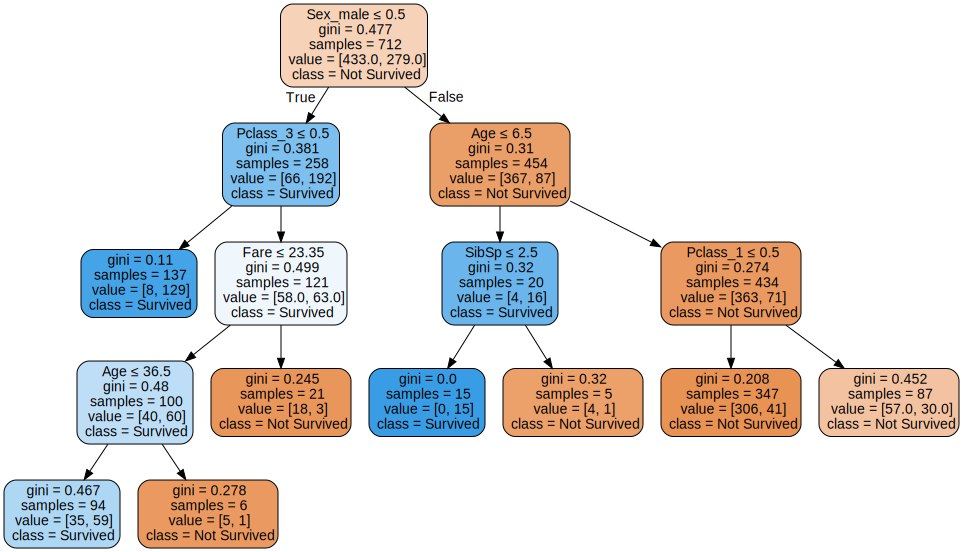

In [27]:
from sklearn import tree

import graphviz 

dot_data = tree.export_graphviz(tree1, out_file=None) 
dot_data = tree.export_graphviz(tree1, out_file=None, 
                     feature_names=x_train.columns,  
                     class_names=['Not Survived','Survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph

In [28]:
ypred_test = tree1.predict(x_test)
ypred_test


array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1])

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred_test, y_test)
print('===============')
print('Confusion Matrix:')
print(mat)
print('===============')
print('Testing Accuracy:')
print(mat.diagonal().sum()/mat.sum())
print('===============')

Confusion Matrix:
[[108  22]
 [  8  41]]
Testing Accuracy:
0.8324022346368715


In [30]:
## training accuracy

ypred_train = tree1.predict(x_train)

mat = confusion_matrix(ypred_train, y_train)
print('===============')
print('Confusion Matrix:')
print(mat)
print('===============')
print('Training Accuracy:')
print(mat.diagonal().sum()/mat.sum())
print('===============')

Confusion Matrix:
[[390  76]
 [ 43 203]]
Training Accuracy:
0.8328651685393258


In [34]:
import warnings
warnings.filterwarnings("ignore")


# Decide what hyperparameter to tune then decide the searching range
param_grid = {'max_leaf_nodes': range(2,10), 
              'criterion':['gini', 'entropy']}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
tree2 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': range(2, 10)})

In [35]:
cv_result = pd.concat([pd.DataFrame(tree2.cv_results_["params"]),pd.DataFrame(tree2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
cv_result['Rank'] = (-cv_result['Accuracy']).argsort().argsort()
cv_result

,criterion,max_leaf_nodes,Accuracy,Rank
0,gini,2,0.785167,10
1,gini,3,0.766956,15
2,gini,4,0.779573,12
3,gini,5,0.804836,7
4,gini,6,0.806254,6
5,gini,7,0.824505,0
6,gini,8,0.813306,5
7,gini,9,0.816104,4
8,entropy,2,0.785167,11
9,entropy,3,0.771181,14


Best Tree is: {'criterion': 'gini', 'max_leaf_nodes': 7}



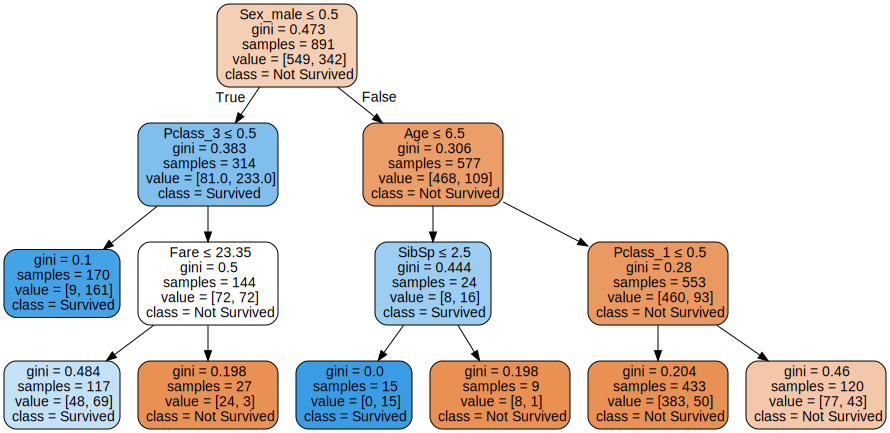

In [33]:
tree3 = DecisionTreeClassifier(**tree2.best_params_)

# Train with the selected hyperparameter
tree3.fit(X, y)

print('Best Tree is:', tree2.best_params_)
print('')
import graphviz 
dot_data = tree.export_graphviz(tree3, out_file=None) 
dot_data = tree.export_graphviz(tree3, out_file=None, 
                     feature_names=x_train.columns,  
                     class_names=['Not Survived','Survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph